## A short guide and example to run fingerprint

This notebook show how to use our implementation of the “fingerprinting approach” based on the Clarke and Minella (2016) method. The proposed alternative approach allows calculating the proportions of each source in the composition of suspended sediment present in rivers and measuring the increase in uncertainty when reducing the number of samples.
To do this, use the following:

The first step is to import the fingerprinting python module:

In [1]:
from PropSource import PropSource

We need to create a fingerprinting object instance and to import the data file:

In [2]:
fp = PropSource("sampledata.xlsx")

In the next cell we can print some information about the dataset for:

CB = Channel Banks

UR = Unpaved Roads 

CF = Crop Fields

Y = Suspended Sediment 


In [3]:
fp.infos()

Sheet name: g_Source(CB)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(UR)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: g_Source(CF)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 20
--
Sheet name: Sediment(Y)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 24
--


In this cell below it is defined as:

nCB = number of samples collected in the CB (Channel Banks)

nUR = number of samples collected in the UR (Unpaved Roads) 

nCF = number of samples collected in the CF (Crop Fields)

nY = number of samples collected in the Y (Suspended Sediment)

In [4]:
nsample=[]
nsample = fp.nsample(nsample)
print('nsample', nsample)


nCB = nsample[0]  # max 9
nUR = nsample[1]  # max 9
nCF = nsample[2] # max 20
nY = nsample[3] # max 24

sY,sCB,sUR,sCF = fp.randon_choice(nY, nCB, nUR, nCF)

# Run the models for all samples and solver options= 0 or 1 or 2
P = fp.run(sY,sCB,sUR,sCF, solve=2)
print(P.shape)

nsample [ 9  9 20 24]
(3, 5843)


 Cloud Proportions: Scatter plot of the set of feasible solutions of the overdetermined linear system
 
                    P1 = CB proportion
                    
                    P2 = UR proportion

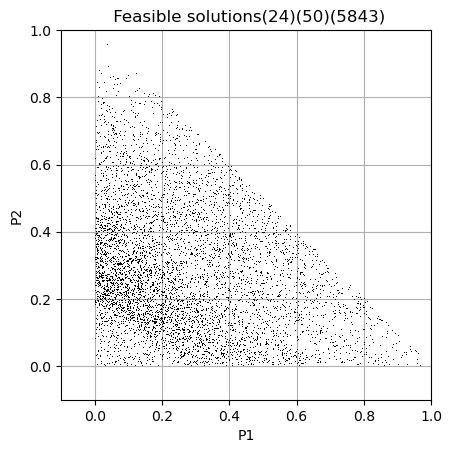

In [7]:
n=50
ss=nY
idx=0
fp.plot2D(P[0:2], ss, n, idx,title = " Feasible solutions")

Cloud Proportions: The confidence region ($95\%$) calculated from the set of feasible solutions using Solve=2 for all samples

Area: 0.417798649981526


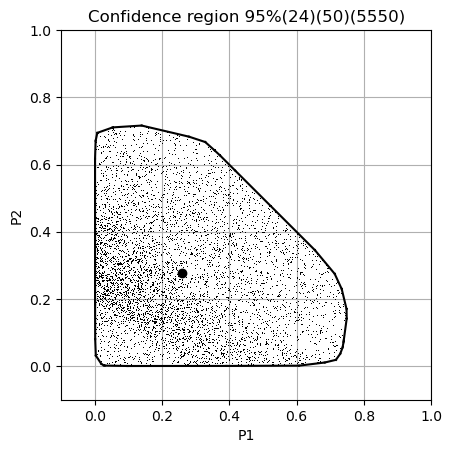

In [8]:
P = fp.confidence_region(P[0:2], p = 95, spacedist = "mahalanobis")
fp.plot2D(P, ss, n , idx, mean=True, convex_hull = True, title = "Confidence region 95%")

Next cells: Suspended sediment reduction

Run multiples times and store for each number of resample in nYs list (Subset=0)

Calcules the coefficient of variation Ycv (Solve = 0, Solve = 1 and Solve = 2)

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nY samples


Samples sizes: [2, 4, 8, 12, 16, 20, 24]
Sample size: 2
Area: 0.38343476208388705


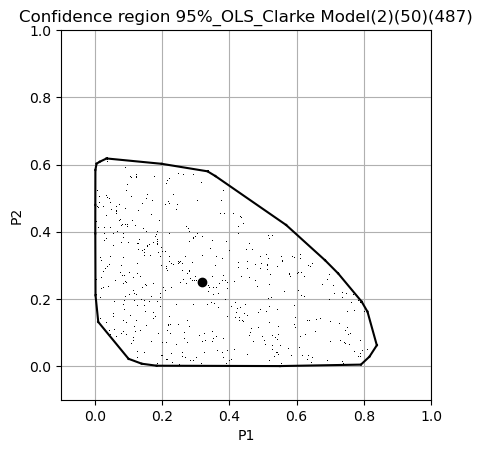

Area: 0.38668370579486894


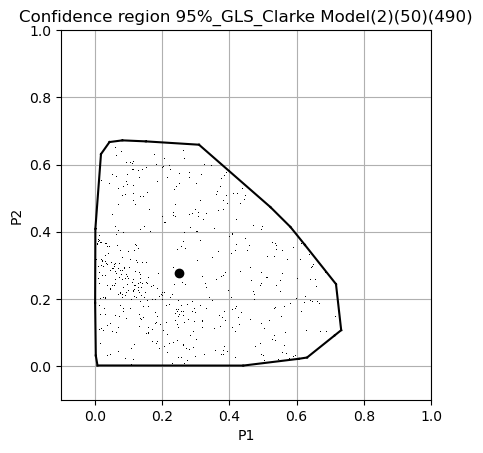

Sample size: 4
Sample size: 8
Sample size: 12
Area: 0.3988787784210496


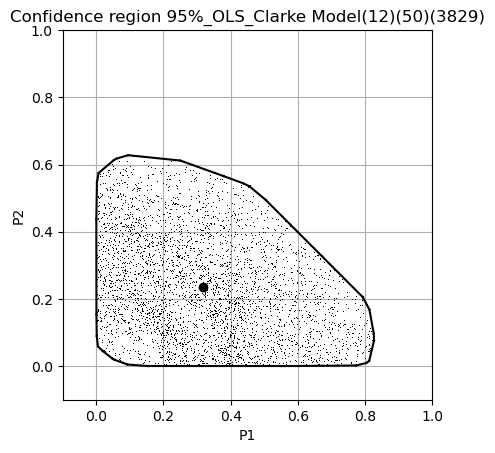

Area: 0.41401580541479227


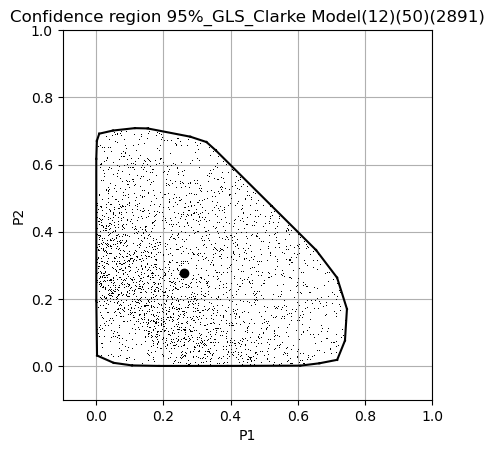

Sample size: 16
Sample size: 20
Area: 0.40210085785603555


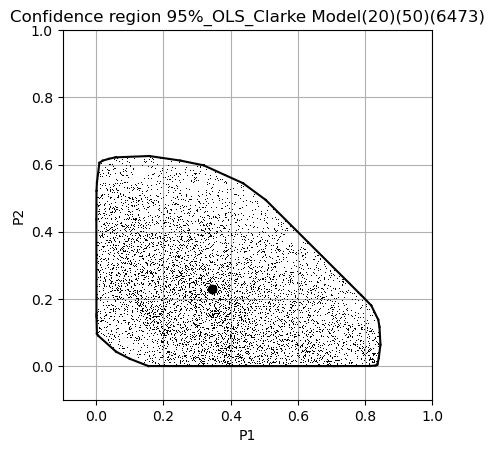

Area: 0.4192308818876187


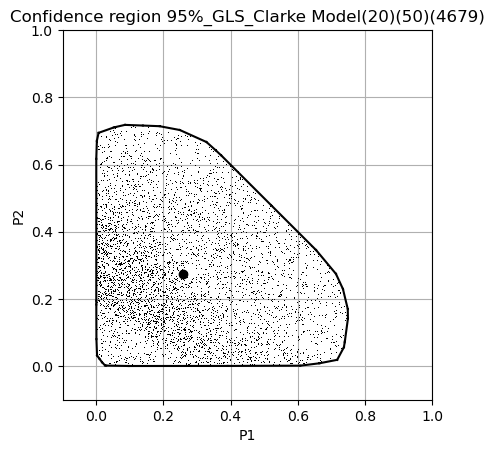

Sample size: 24
--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
_____________________________________________________________
2 	0.361 	0.045 	3240 	487 	0.319 	0.250 	0.431
4 	0.380 	0.025 	6480 	1855 	0.410 	0.255 	0.336
8 	0.392 	0.017 	12960 	2775 	0.390 	0.244 	0.366
12 	0.399 	0.012 	19440 	3829 	0.317 	0.235 	0.448
16 	0.402 	0.006 	25920 	5213 	0.346 	0.249 	0.406
20 	0.402 	0.004 	32400 	6473 	0.345 	0.230 	0.425
24 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
_____________________________________________________________
Mean of the areas: [0.361 0.38  0.392 0.399 0.402 0.402 0.403]
Coefficient of variation: [12.432  6.641  4.463  2.98   1.508  0.973  0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
_____________________________________________________________
2 	0.361 	0.045 	3240 	487 	0.319 	0.250 	0.431
4 	0.380 

In [9]:
#Choose the sample subset for reduction
#n=50 times
nYs = [2,4,8,12,16,20,24]

Ycv0, Ycv1, Ycv2 = fp.multi_runs(50, nYs,nCB,nUR,nCF, plots2D=[2,12,20])


In [10]:
X1_0 = nYs.copy()
Y1_0 = Ycv0.copy()

X1_1 = nYs.copy()
Y1_1 = Ycv1.copy()

X1_2 = nYs.copy()
Y1_2 = Ycv2.copy()

Plots options

In [11]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


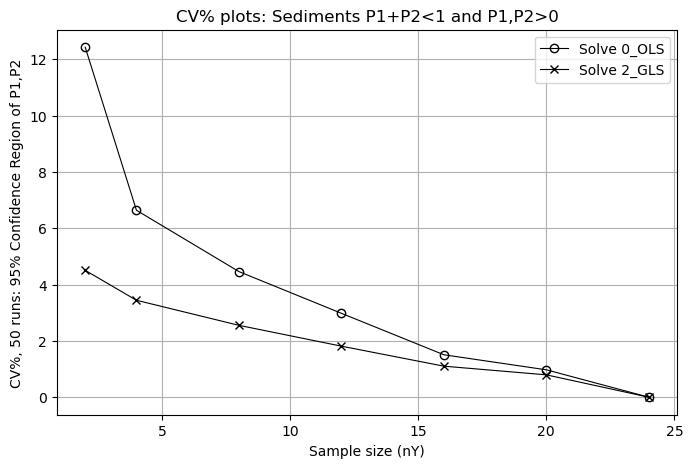

In [13]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         #X1_1, Y1_1, "ks-",
         X1_2, Y1_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: Sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size (nY)')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0_OLS',
            #'Solve 1', 
            'Solve 2_GLS'], loc='upper right')
plt.savefig('Coeff_Var_nY.png')
plt.savefig('Coeff_Var_nY.eps')

plt.grid()
plt.show()

Next cells: Cropped field reduction

Run multiples times and store for each number of resample in nCFs list (Subset=3)

Calcules the coefficient of variation CFcv (Solve = 0, Solve = 1 and Solve = 2)

Cloud Proportions: The confidence region (95%) calculated from the set of feasible solutions each reduction of nCF samples

Samples sizes: [2, 4, 8, 12, 16, 20]
Sample size: 2
Area: 0.3618954042660784


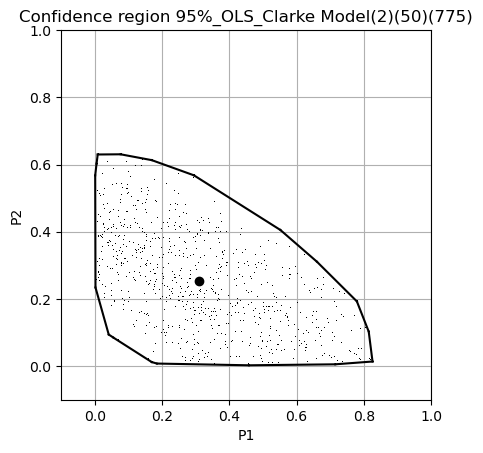

Area: 0.14443422237541587


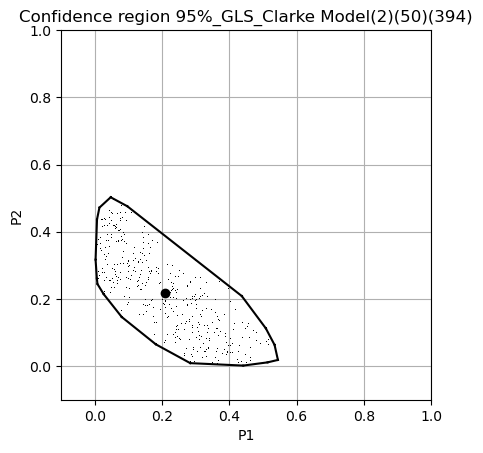

Sample size: 4
Sample size: 8
Sample size: 12
Area: 0.40172883338073734


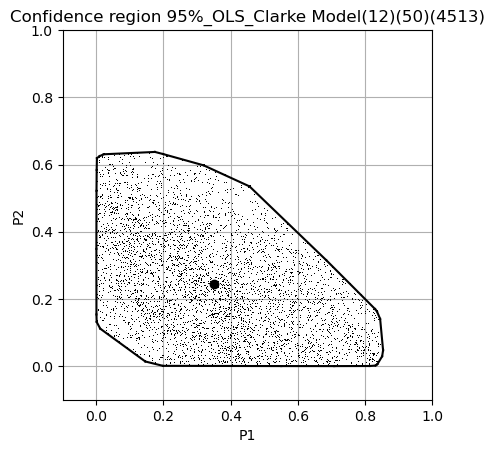

Area: 0.4096933726208624


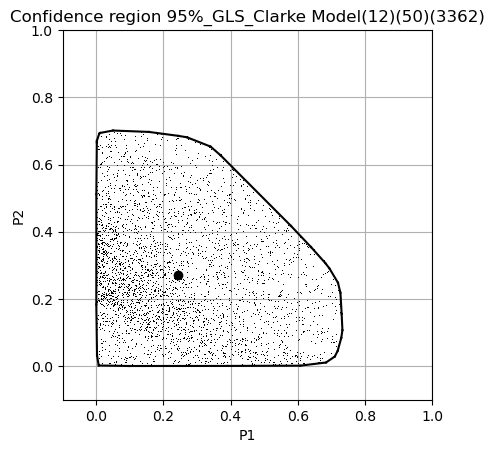

Sample size: 16
Sample size: 20
Area: 0.402769343379552


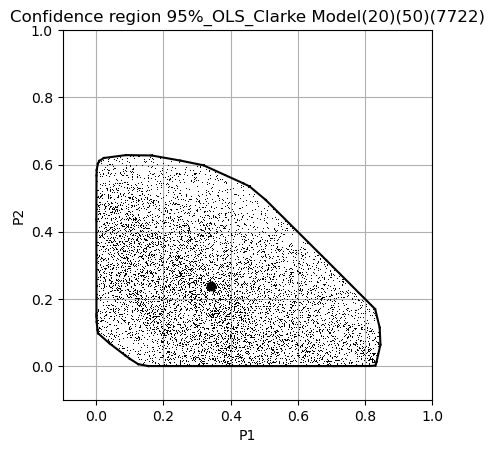

Area: 0.417798649981526


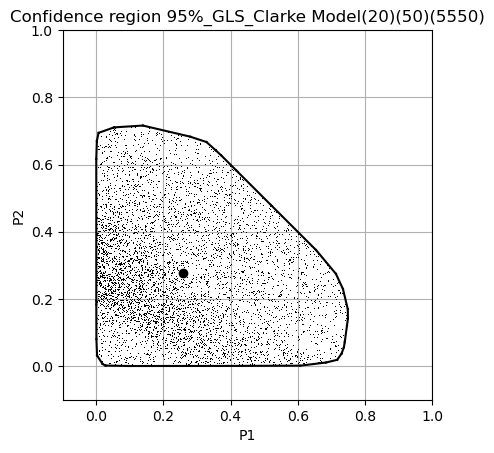

--------------------------------------------------------------
Solve_0
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
_____________________________________________________________
2 	0.356 	0.043 	3888 	775 	0.310 	0.253 	0.437
4 	0.379 	0.031 	7776 	1012 	0.378 	0.231 	0.391
8 	0.394 	0.013 	15552 	2878 	0.382 	0.258 	0.360
12 	0.401 	0.010 	23328 	4513 	0.351 	0.245 	0.404
16 	0.400 	0.007 	31104 	6232 	0.354 	0.235 	0.412
20 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
_____________________________________________________________
Mean of the areas: [0.356 0.379 0.394 0.401 0.4   0.403]
Coefficient of variation: [12.113  8.163  3.397  2.45   1.652  0.   ]
--------------------------------------------------------------
Solve_1
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
_____________________________________________________________
2 	0.356 	0.043 	3888 	775 	0.310 	0.253 	0.437
4 	0.379 	0.031 	7776 	1012 	0.378 	0.231 	0.391
8 	0.394 	0.013 	15552 	2878 	0.382 	0.2

In [14]:
#Choose the sample subset for reduction
#n=50 times
nCFs = [2,4,8,12,16,20]
CFcv0, CFcv1, CFcv2 = fp.multi_runs(50, nY,nCB,nUR,nCFs, plots2D=[2,12,20])

In [15]:
X2_0 = nCFs.copy()
Y2_0 = CFcv0.copy()

X2_1 = nCFs.copy()
Y2_1 = CFcv0.copy()

X2_2 = nCFs.copy()
Y2_2 = CFcv2.copy()

Figure options

In [16]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


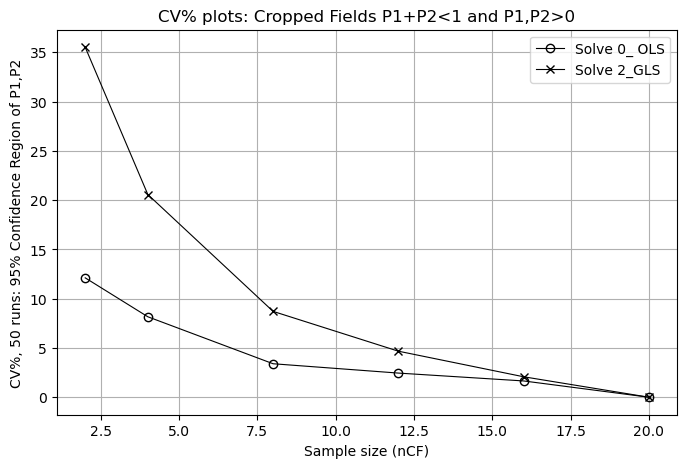

In [17]:
fig = plt.figure(figsize=(8, 5))

plt.plot(X2_0, Y2_0, "ko-",
         #X2_1, Y2_1, "ks-",
         X2_2, Y2_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: Cropped Fields P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size (nCF)')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0_ OLS',
            #'Solve 1', 
            'Solve 2_GLS'], loc='upper right')
plt.savefig('Coeff_Var_nCF.png')
plt.savefig('Coeff_Var_nCF.eps')

plt.grid()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


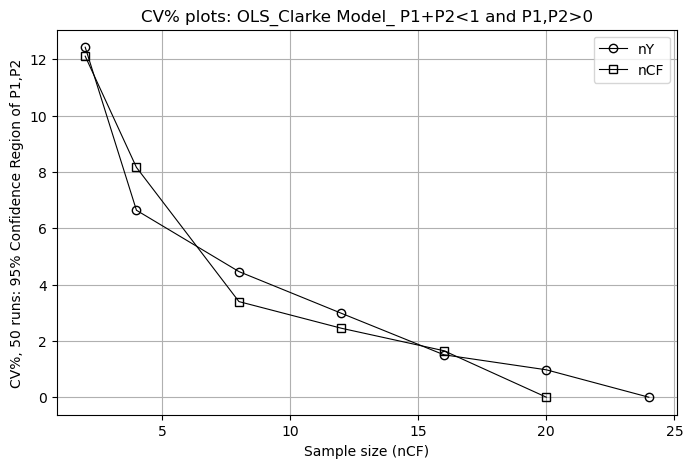

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         X2_0, Y2_0, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: OLS_Clarke Model_ P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size (nCF)')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['nY',
            #'OLS3x3', 
            'nCF'], loc='upper right')
plt.savefig('Coeff_Var_nY_and_nCF_OLS.png')
plt.savefig('Coeff_Var_nY_and_nCF_OLS.eps')

plt.grid()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


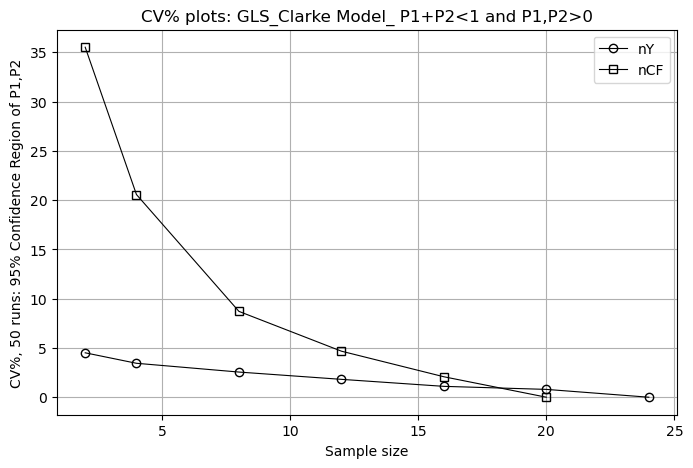

In [20]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: GLS_Clarke Model_ P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['nY',
            'nCF'], loc='upper right')
plt.savefig('Coeff_Var_nY_and_nCF_GLS.png')
plt.savefig('Coeff_Var_nY_and_nCF_GLS.eps')
plt.grid()
plt.show()